In [1]:
%matplotlib notebook
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.sparse import diags

In [2]:
# Solves 1D time-independent Schrodinger equation for quantum particle in a box
# Hartree atomic units h-bar = m_e = e = 1, so a_0 = 1 (Bohr radius)
Lx = np.pi       # box size
Nx = 1001        # number of grid cells
dx = Lx/(Nx-1)   # grid cell size
x = np.linspace(-Lx/2.0,Lx/2.0,Nx)

# H1 is a tri-diagonal matrix for -(1/2)d^2/dx^2
H1 = diags([-1, 2, -1], [-1, 0, 1], shape=(Nx-2,Nx-2)).toarray() # Nx-2 interior points
H1 = H1/(2*dx*dx)
w,v = LA.eig(H1) # w is eigenvalues, columns of v are corresponding eigenvectors
p = w.argsort(); w = w[p]; v = v[:,p] # sorts eigenvalues smallest to largest
v = np.vstack([np.zeros((1,Nx-2)),v,np.zeros((1,Nx-2))]) # add on boundaries
amp = np.sqrt(np.trapz(np.abs(v)**2,axis=0,dx=dx)) # uses trapezoidal integration to normalize
v = v/amp[None,:]

In [3]:
# side note: vertically stacking arrays with np.vstack
a = np.vstack([7*np.arange(4),5*np.eye(3,4),3*np.ones((1,4))]) # stacks arrays vertically
print(a)

[[ 0.  7. 14. 21.]
 [ 5.  0.  0.  0.]
 [ 0.  5.  0.  0.]
 [ 0.  0.  5.  0.]
 [ 3.  3.  3.  3.]]


In [4]:
# side note: trapezoidal integration of columns with np.trapz
c = np.trapz(a,axis=0,dx=2.0)
print(c)

[13. 20. 27. 24.]


In [5]:
# side note: divide all values in columns by values in a row array
print(a/c[None,:]) 

[[0.         0.35       0.51851852 0.875     ]
 [0.38461538 0.         0.         0.        ]
 [0.         0.25       0.         0.        ]
 [0.         0.         0.18518519 0.        ]
 [0.23076923 0.15       0.11111111 0.125     ]]


In [6]:
# side note: multiply elements of array by conjugate
b = np.ones((3,4))*(1+2j)
print(np.real(b*np.conjugate(b)))
print(np.abs(b)**2)

[[5. 5. 5. 5.]
 [5. 5. 5. 5.]
 [5. 5. 5. 5.]]
[[5. 5. 5. 5.]
 [5. 5. 5. 5.]
 [5. 5. 5. 5.]]


<IPython.core.display.Javascript object>


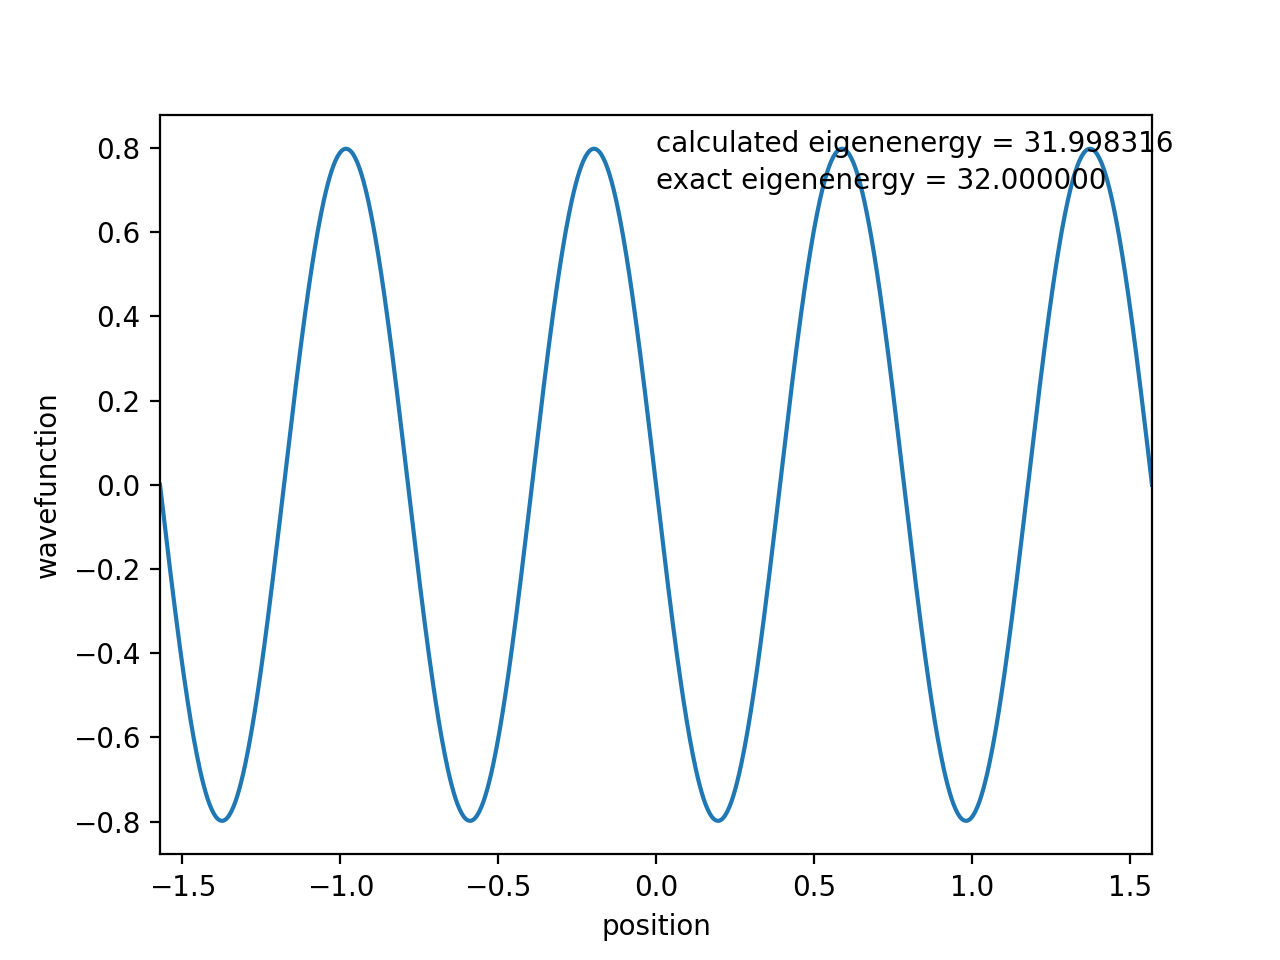

Text(0.5, 0.9, 'exact eigenenergy = 32.000000')

In [17]:
j = 7
fig = plt.figure()
ax = plt.axes(xlim=(-Lx/2.0,Lx/2.0))
ax.plot(x,v[:,j],'-')
plt.xlabel('position')
plt.ylabel('wavefunction')
ax.text(0.5, 0.95,'calculated eigenenergy = %.6f' % w[j],transform=ax.transAxes)
ax.text(0.5, 0.90,'exact eigenenergy = %.6f' % (0.5*(j+1)**2),transform=ax.transAxes)

<IPython.core.display.Javascript object>


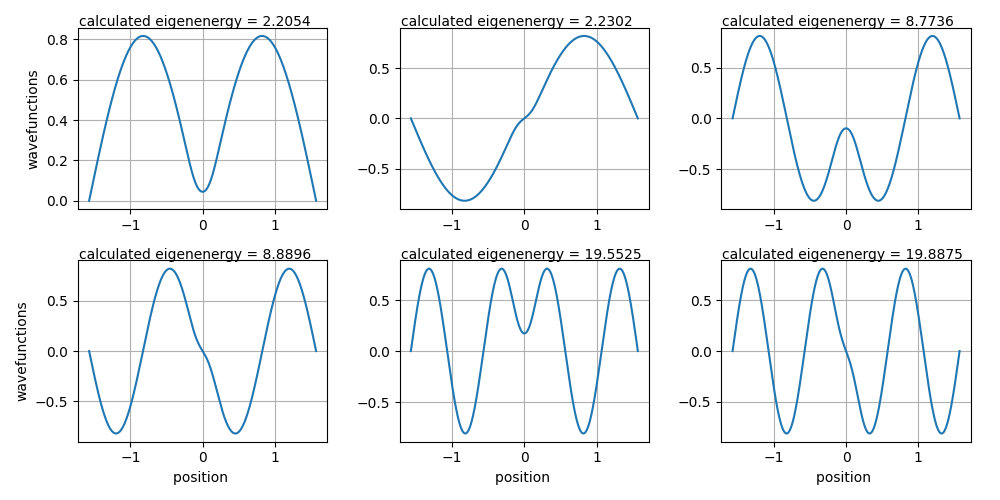

In [30]:
#4a
%matplotlib notebook
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.sparse import diags

# Solves 1D time-independent Schrodinger equation for quantum particle in a box
# Hartree atomic units h-bar = m_e = e = 1, so a_0 = 1 (Bohr radius)
Lx = np.pi       # box size
Nx = 1001        # number of grid cells
dx = Lx/(Nx-1)   # grid cell size
x = np.linspace(-Lx/2.0,Lx/2.0,Nx)
########


V =100*np.exp(-64*(x**2))
Vx = np.diag(V)



# H1 is a tri-diagonal matrix for -(1/2)d^2/dx^2
H1 = diags([-1, 2, -1], [-1, 0, 1], shape=(Nx-2,Nx-2)).toarray() # Nx-2 interior points
H1 = H1/(2*dx*dx)
H1 += Vx[1:Nx-1,1:Nx-1]

w,v = LA.eig(H1) # w is eigenvalues, columns of v are corresponding eigenvectors
p = w.argsort(); w = w[p]; v = v[:,p] # sorts eigenvalues smallest to largest
v = np.vstack([np.zeros((1,Nx-2)),v,np.zeros((1,Nx-2))]) # add on boundaries
amp = np.sqrt(np.trapz(np.abs(v)**2,axis=0,dx=dx)) # uses trapezoidal integration to normalize
v = v/amp[None,:]
#########

'''
j = 7
fig = plt.figure()
ax = plt.axes(xlim=(-Lx/2.0,Lx/2.0))
ax.plot(x,v[:,j],'-')
plt.xlabel('position')
plt.ylabel('wavefunction')
ax.text(0.5, 0.95,'calculated eigenenergy = %.6f' % w[j],transform=ax.transAxes)
ax.text(0.5, 0.90,'exact eigenenergy = %.6f' % (0.5*(j+1)**2),transform=ax.transAxes)
'''

fig,ax = plt.subplots(nrows = 2, ncols=3,figsize=(10,5))
plt.subplots_adjust(hspace=0.25)

j = 0 
for i in range(2):
    for k in range(3):
        ax[i][k].plot(x,v[:,j],'-')
        ax[i][k].text(0.005, 1.01,'calculated eigenenergy = %.4f' % w[j],transform=ax[i][k].transAxes)
#        ax[i][k].text(0.5, 0.90,'exact eigenenergy = %.6f' % (0.5*(j+1)**2),transform=ax[i][k].transAxes)
        ax[i][k].grid()
        #ax[i][k].set_xlabel('position')
        #
        #ax[i][k].set_ylabel('wavefunctions')
        plt.setp(ax[-1, :], xlabel='position ')
        plt.setp(ax[:, 0], ylabel='wavefunctions')
        
        j+= 1
fig.tight_layout()
plt.show()

fig.savefig('4aQM.pdf',bbox_inches='tight')


<IPython.core.display.Javascript object>


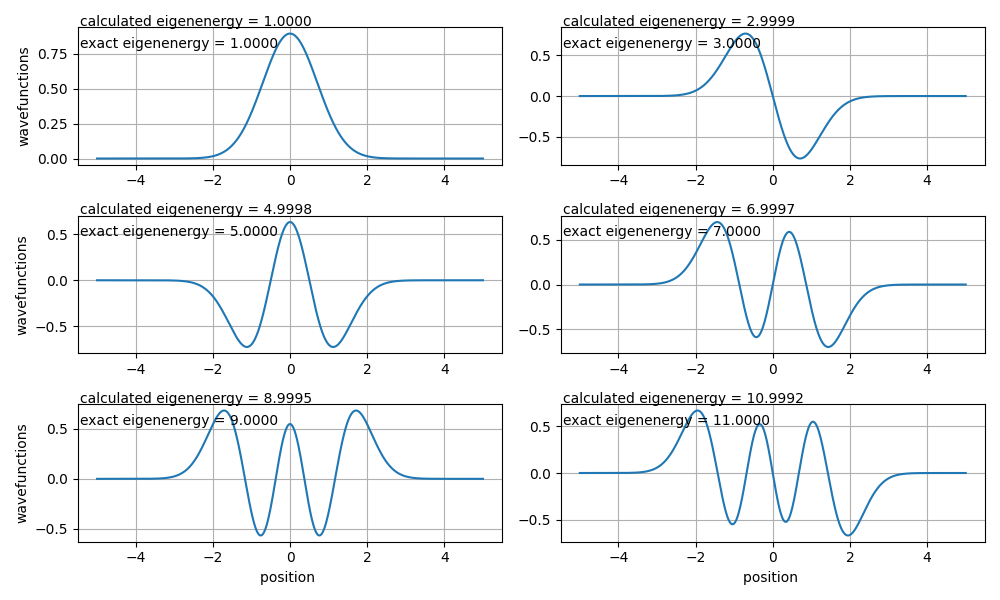

In [48]:
#4a
%matplotlib notebook
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.sparse import diags

# Solves 1D time-independent Schrodinger equation for quantum particle in a box
# Hartree atomic units h-bar = m_e = e = 1, so a_0 = 1 (Bohr radius)
Lx = 10.0       # box size
Nx = 1001        # number of grid cells
dx = Lx/(Nx-1)   # grid cell size
x = np.linspace(-Lx/2.0,Lx/2.0,Nx)
########

w0 = 2
m = 1
V = 0.5*m*(w0**2)*(x**2)
Vx = np.diag(V)



# H1 is a tri-diagonal matrix for -(1/2)d^2/dx^2
H1 = diags([-1, 2, -1], [-1, 0, 1], shape=(Nx-2,Nx-2)).toarray() # Nx-2 interior points
H1 = H1/(2*dx*dx)
H1 += Vx[1:Nx-1,1:Nx-1]

w,v = LA.eig(H1) # w is eigenvalues, columns of v are corresponding eigenvectors
p = w.argsort(); w = w[p]; v = v[:,p] # sorts eigenvalues smallest to largest
v = np.vstack([np.zeros((1,Nx-2)),v,np.zeros((1,Nx-2))]) # add on boundaries
amp = np.sqrt(np.trapz(np.abs(v)**2,axis=0,dx=dx)) # uses trapezoidal integration to normalize
v = v/amp[None,:]
#########

'''
j = 7
fig = plt.figure()
ax = plt.axes(xlim=(-Lx/2.0,Lx/2.0))
ax.plot(x,v[:,j],'-')
plt.xlabel('position')
plt.ylabel('wavefunction')
ax.text(0.5, 0.95,'calculated eigenenergy = %.6f' % w[j],transform=ax.transAxes)
ax.text(0.5, 0.90,'exact eigenenergy = %.6f' % (0.5*(j+1)**2),transform=ax.transAxes)
'''

fig,ax = plt.subplots(nrows = 3, ncols=2,figsize=(10,6))
plt.subplots_adjust(hspace=0.25)

j = 0
for i in range(3):
    for k in range(2):
        E = (j+0.5)*1*w0
        ax[i][k].plot(x,v[:,j],'-')
        ax[i][k].text(0.005, 1.01,'calculated eigenenergy = %.4f' % w[j],transform=ax[i][k].transAxes)
        ax[i][k].text(0.005, 0.85,'exact eigenenergy = %.4f' % (E),transform=ax[i][k].transAxes)
        ax[i][k].grid()
        #ax[i][k].set_xlabel('position')
        #ax[i][k].set_ylabel('wavefunctions')
        plt.setp(ax[-1, :], xlabel='position ')
        plt.setp(ax[:, 0], ylabel='wavefunctions')
        
        j+= 1
fig.tight_layout()
plt.show()


#fig.savefig('4bQM.pdf',bbox_inches='tight')


<IPython.core.display.Javascript object>


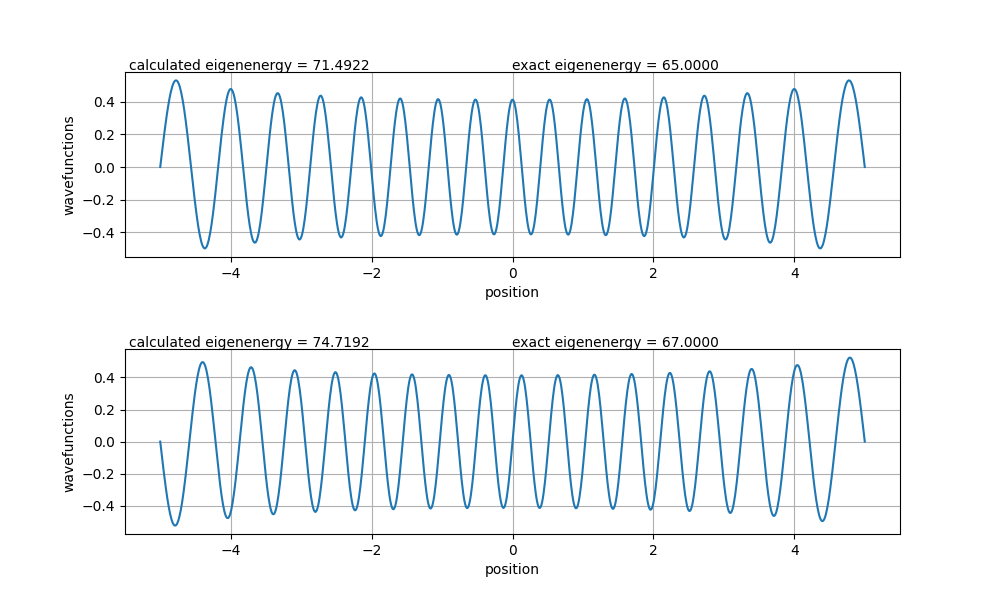

In [38]:
fig,ax = plt.subplots(nrows = 2, ncols=1,figsize=(10,6))
plt.subplots_adjust(hspace=0.5)

j = 32
for i in range(2):
    for k in range(1):
        E = (j+0.5)*1*w0
        ax[i].plot(x,v[:,j],'-')
        ax[i].text(0.005,1.01,'calculated eigenenergy = %.4f' % w[j],transform=ax[i].transAxes)
        ax[i].text(0.5, 1.01,'exact eigenenergy = %.4f' % (E),transform=ax[i].transAxes)
        ax[i].grid()
        ax[i].set_xlabel('position')
        ax[i].set_ylabel('wavefunctions')
        
        j+= 1
plt.show()

fig.savefig('10percentenergySHO.pdf',bbox_inches='tight')

<IPython.core.display.Javascript object>


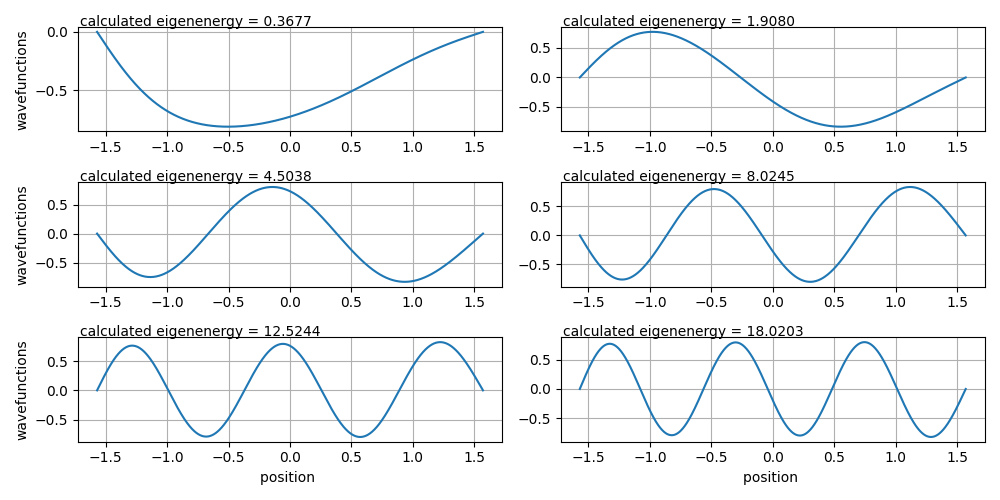

In [44]:
#4a
%matplotlib notebook
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.sparse import diags

# Solves 1D time-independent Schrodinger equation for quantum particle in a box
# Hartree atomic units h-bar = m_e = e = 1, so a_0 = 1 (Bohr radius)
Lx = np.pi       # box size
Nx = 1001        # number of grid cells
dx = Lx/(Nx-1)   # grid cell size
x = np.linspace(-Lx/2.0,Lx/2.0,Nx)
########


V = (x**3)
Vx = np.diag(V)



# H1 is a tri-diagonal matrix for -(1/2)d^2/dx^2
H1 = diags([-1, 2, -1], [-1, 0, 1], shape=(Nx-2,Nx-2)).toarray() # Nx-2 interior points
H1 = H1/(2*dx*dx)
H1 += Vx[1:Nx-1,1:Nx-1]

w,v = LA.eig(H1) # w is eigenvalues, columns of v are corresponding eigenvectors
p = w.argsort(); w = w[p]; v = v[:,p] # sorts eigenvalues smallest to largest
v = np.vstack([np.zeros((1,Nx-2)),v,np.zeros((1,Nx-2))]) # add on boundaries
amp = np.sqrt(np.trapz(np.abs(v)**2,axis=0,dx=dx)) # uses trapezoidal integration to normalize
v = v/amp[None,:]
#########

'''
j = 7
fig = plt.figure()
ax = plt.axes(xlim=(-Lx/2.0,Lx/2.0))
ax.plot(x,v[:,j],'-')
plt.xlabel('position')
plt.ylabel('wavefunction')
ax.text(0.5, 0.95,'calculated eigenenergy = %.6f' % w[j],transform=ax.transAxes)
ax.text(0.5, 0.90,'exact eigenenergy = %.6f' % (0.5*(j+1)**2),transform=ax.transAxes)
'''

fig,ax = plt.subplots(nrows = 3, ncols=2,figsize=(10,5))
plt.subplots_adjust(hspace=0.25)

j = 0 
for i in range(3):
    for k in range(2):
        ax[i][k].plot(x,v[:,j],'-')
        ax[i][k].text(0.005, 1.01,'calculated eigenenergy = %.4f' % w[j],transform=ax[i][k].transAxes)
#        ax[i][k].text(0.5, 0.90,'exact eigenenergy = %.6f' % (0.5*(j+1)**2),transform=ax[i][k].transAxes)
        ax[i][k].grid()
        #ax[i][k].set_xlabel('position')
        #
        #ax[i][k].set_ylabel('wavefunctions')
        plt.setp(ax[-1, :], xlabel='position ')
        plt.setp(ax[:, 0], ylabel='wavefunctions')
        
        j+= 1
fig.tight_layout()
plt.show()

fig.savefig('4cQM.pdf',bbox_inches='tight')
